1. [EFS (Elastic File System)](#efs-elastic-file-system)
2. [EFS infra](#efs-infra)
3. [EFS Performance](#efs-performance)
4. [Storage class](#storage-class)
5. [Availability & Duration](#availability--duration)
6. [To create EFS](#to-create-efs)
7. [Attach EFS to EC2 instances](#attach-efs-to-ec2-instances)
8. [To Check the security groups attached to EFS via EC2](#to-check-the-security-groups-attached-to-efs-via-ec2)
9. [To Check if EFS attached to EC2 successfully](#to-check-if-efs-attached-to-ec2-successfully)

#### EFS (Elastic File System):
- managed NFS (Network File System) and can be mounted on an EC2 instance
- works with EC2 instances in different AZs
- expensive (3 times of gp2)
- scalable

#### EFS infra:
- EFS File System surrounded by Security Groups
- instances from various AZs can be connected to the EFS File system
- uses NFS protocol
- SG controls the access
- EFS works only with linux
- it automatically scales
- POSIX file system

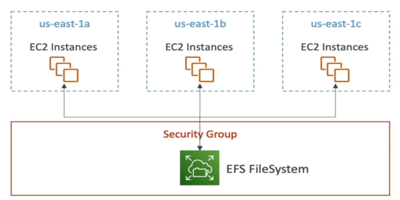

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/EFS3.jpeg')
new_image = img.resize((400, 200))
display(new_image)

#### EFS Performance:
- EFS scale:
    - 1000 NFS clients
    - 10Gb throughput

- Performance mode:
    - General Purpose
    - Max I/O

- Throughput Mode:
    - Bursting
    - Provisioned
    - Elastic

#### Storage class:
- Storage Tiers:
    - Standard: frequently accessed
    - Infrequent access: cost to retrieve but less to store
    - Archive: rarely access, 50% cheaper
    - Life-cycle policies:
        - enable us to move the files between storage tiers

#### Availability & Duration:
- Standard: multi AZ, prod
- One Zone: one AZ, development

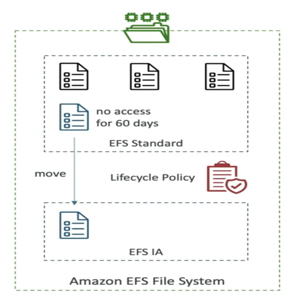

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/EFS-LifecyclePolicy.jpeg')
new_image = img.resize((300, 300))
display(new_image)

#### To create EFS:
- Search for EFS in AWS
- Create File system
    - Name
    - Vpc
    - Customize
        - Name
        - File system type
            - Regional
            - One Zone
                - Choose AZ 
        - Automatic Backups
        - Life-cycle management
            - Transfer to IA -> choose the days
            - Transfer to Archive -> choose the days
            - Transfer to Standard -> choose the days
        - Performance setting
            - Throughput mode
                - Enhanced
                - Bursting
            - Elastic
            - Provisioned
    - Network Access
        - Attach the security group created for the EFS
    - File system policy
    - Create



#### Attach EFS to EC2 instances:

4 Ways:
- First:
    - Attach EFS via standard EC launching process
        - make sure to choose the AZ for EFS selection
        - File System
            - EFS
            - FSx
            - Add shared file system
                - File system (created EFS in EFS page)
                - mount point
            - Automatically create and attach Security Groups 
                - creates a SG for instance
                    - outbound rules with NFS
                - creates a SG for EFS
                    - inbound rules with NFS
            - Automatically mount shared file system
                - we can find the SGs mounted in EFS console across AZs
    - Create instance

- Second:
    - In EFS console after creating EFS -> select the Attach option
        - using EFS mount helper
            - Run ```sudo yum install -y amazon-efs-utils``` in EC2 instance
            - eg: ```sudo mount -t efs -o tls fs-02b26ac6d97ca00fb:/ efs```
            - https://docs.aws.amazon.com/efs/latest/ug/efs-mount-helper.html 

- Third:
    - In EFS console after creating EFS -> select the Attach option
        - using NFS client
            - eg: ```sudo mount -t nfs4 -o nfsvers=4.1,rsize=1048576,wsize=1048576,hard,timeo=600,retrans=2,noresvport fs-02b26ac6d97ca00fb.efs.us-east-1.amazonaws.com:/ efs```
            - https://docs.aws.amazon.com/efs/latest/ug/mounting-fs-old.html

- Fourth:
    - Automatically mount the EFS
        - https://docs.aws.amazon.com/efs/latest/ug/mount-fs-auto-mount-onreboot.html 

#### To Check the security groups attached to EFS via EC2:
- Go to EFS console, Networking
    - We can see the SG in each AZs.
- To check if SG has the permissions for EFS
    - Go to EC2 -> Security groups
    - Select the SG
    - Go to Actions -> Edit inbound rules
    - See the rule with the protocol as NFS -> 2409

#### To Check if EFS attached to EC2 successfully:
- Open EC2 instance by EC2 instance connect
- Type the below commands
    - ```ls /mnt/efs/fs1```
    - ```sudo su```
    - ```echo "hello world" > /mnt/efs/fs1/file.txt```
    - ```cat file.txt```